# PARTE 1


## Importanto Pacotes e dados



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/ML-DeepLearning/ML_Florindo/PROJETO_1'

file = r'/content/drive/MyDrive/ML-DeepLearning/ML_Florindo/PROJETO_1/casesBrazil.csv'
data = pd.read_csv(file)

print(data)

Mounted at /content/drive
     day    cases
0      1        1
1      2        1
2      3        1
3      4        2
4      5        2
..   ...      ...
129  130  1546935
130  131  1580502
131  132  1605694
132  133  1630061
133  134  1675264

[134 rows x 2 columns]


## Verificando o comportamento gráfico

In [3]:
A=np.array(data) # transformando os dados em array's para melhor manipulação
x = A[:,0] # eixo Ox, correspodendo aos dias 
y = A[:,1] # eixo Oy, correspodnendo ao número de casos
#A # vizualização de A em forma de matriz (array)

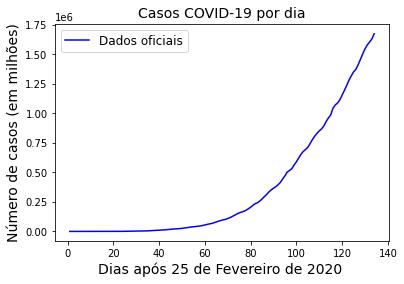

In [4]:
# plotando o gráfico a partir dos dados fornecidos

plt.plot(x,y,color='b',label='Dados oficiais')
plt.xlabel('Dias após 25 de Fevereiro de 2020 ',FontSize=14)
plt.ylabel('Número de casos (em milhões)', FontSize=14)
plt.title('Casos COVID-19 por dia',FontSize=14)
plt.rcParams['legend.fontsize'] = 12
plt.legend()

#from google.colab import files
#plt.savefig("figura1.png",dpi=300)
#files.download('figura1.png')

## Normalização dos dados

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


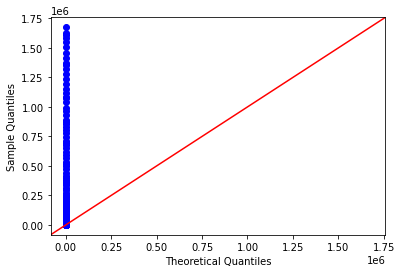

In [5]:
# normalização: através do gráfico QQ vemos que os dados não seguem uma
# distribuição normal. Assim, utilizamos scaling
# https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

import statsmodels.api as sm
import pylab as py

# from google.colab import files

QQ = sm.qqplot(data, line ='45')
plt.rcParams['legend.fontsize'] = 12
#plt.savefig("QQ.png",dpi=300)
#files.download('QQ.png')

In [6]:
# normalizando via scaling

x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
y = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos

## Modelagem para polinômio de grau 3

Theta após 1000 iterações =  [0.03890576612003968, -0.3670215697371889, 0.30781886780449164, 1.0218253092865557]
Valor da função de custo para 1000 iterações =  0.03285974066429697


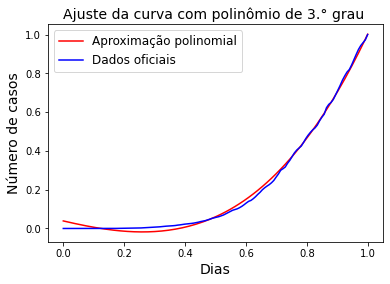

In [7]:
n = 3 # escolha do grau do polinômio
m=len(x) # 134 dias

X=np.zeros([m,n+1]) # os valores serão armazenados na matriz X
x1=np.zeros([m,1])
x2=np.zeros([m,1])
x3=np.zeros([m,1])

for i in range(m):
    for j in range(n+1):
        X[i][j]=x[i]**j
        x1[i][0]=x[i]
        x2[i][0]=x[i]**2
        x3[i][0]=x[i]**3

theta=([1,1,1,1]) # theta inicial
alpha=1 # coeficiente de aprendizagem 
a=(np.dot(X, theta) - y)

for i in range(1000):
    t0=theta[0] - alpha*(1/m)*(sum(a)) 
    t1=theta[1] - alpha*(1/m)*(sum(a.T.dot(x1)))
    t2=theta[2] - alpha*(1/m)*(sum(a.T.dot(x2)))
    t3=theta[3] - alpha*(1/m)*(sum(a.T.dot(x3)))
    theta=([t0,t1,t2,t3]) # armazenando os novos thetas
    a=(np.dot(X, theta) - y)
print("Theta após 1000 iterações = ",theta)

plt.plot(x,X@theta, color='r',label='Aproximação polinomial')
plt.plot(x,y, color='blue',label='Dados oficiais')
plt.xlabel('Dias',FontSize=14)
plt.ylabel('Número de casos', FontSize=14)
plt.title('Ajuste da curva com polinômio de 3.° grau ',FontSize=14)
plt.rcParams['legend.fontsize'] = 12
plt.legend()
print("Valor da função de custo para 1000 iterações = ",a.T.dot(a))
#plt.savefig("figura3.png",dpi=300)
#files.download('figura3.png')

## Modelagem para polinômio de grau 5

Theta após 1000 iterações =  [0.005718108059950365, -0.11529567165518355, 0.1985067773448407, 0.3346393719702056, 0.3406923335118288, 0.28413119749334464]
Valor da função de custo para 1000 iterações =  0.02234624547662847


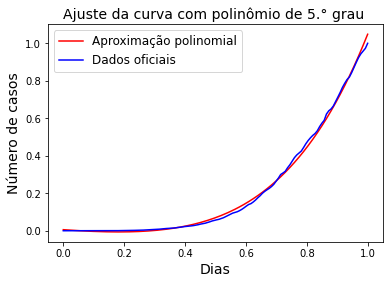

In [8]:
n = 5
m=len(x)

X=np.zeros([m,n+1])
x1=np.zeros([m,1])
x2=np.zeros([m,1])
x3=np.zeros([m,1])
x4=np.zeros([m,1])
x5=np.zeros([m,1])

for i in range(m):
    for j in range(n+1):
        X[i][j]=x[i]**j
        x1[i][0]=x[i]
        x2[i][0]=x[i]**2
        x3[i][0]=x[i]**3
        x4[i][0]=x[i]**4
        x5[i][0]=x[i]**5

theta=([1,1,1,1,1,1])
alpha=1
a=(np.dot(X, theta) - y)

for i in range(1000):
    t0=theta[0] - alpha*(1/m)*(sum(a)) 
    t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
    t2=theta[2] - alpha*(1/m)*(sum(a.T@x2))
    t3=theta[3] - alpha*(1/m)*(sum(a.T@x3))
    t4=theta[4] - alpha*(1/m)*(sum(a.T@x4))
    t5=theta[5] - alpha*(1/m)*(sum(a.T@x5))
    theta=([t0,t1,t2,t3,t4,t5])
    a=(np.dot(X, theta) - y)
print("Theta após 1000 iterações = ",theta)

plt.plot(x,X@theta, color='r',label='Aproximação polinomial')
plt.plot(x,y, color='blue',label='Dados oficiais')
plt.xlabel('Dias',FontSize=14)
plt.ylabel('Número de casos', FontSize=14)
plt.title('Ajuste da curva com polinômio de 5.° grau ',FontSize=14)
plt.rcParams['legend.fontsize'] = 12
plt.legend()
print("Valor da função de custo para 1000 iterações = ",a.T@a)
#plt.savefig("figura4.png",dpi=300)
#files.download('figura4.png')

## Modelagem para polinômio de grau 10

Theta após 1000 iterações =  [0.013294142153526672, -0.1552471171779433, 0.20693483731200527, 0.3478843252618462, 0.3403761578035019, 0.2656454849379809, 0.16913158487337965, 0.07282962379233895, -0.013777899890183824, -0.08746133399747431, -0.14796117495894856]
Valor da função de custo para 1000 iterações =  0.008754918704006569


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

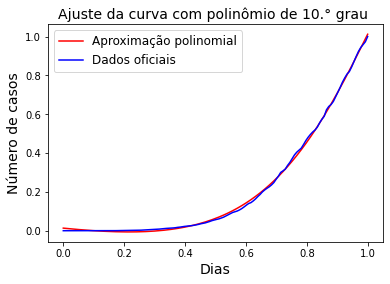

In [9]:
n = 10
m=len(x)

X=np.zeros([m,n+1])
x1=np.zeros([m,1])
x2=np.zeros([m,1])
x3=np.zeros([m,1])
x4=np.zeros([m,1])
x5=np.zeros([m,1])
x6=np.zeros([m,1])
x7=np.zeros([m,1])
x8=np.zeros([m,1])
x9=np.zeros([m,1])
x10=np.zeros([m,1])

for i in range(m):
    for j in range(n+1):
        X[i][j]=x[i]**j
        x1[i][0]=x[i]
        x2[i][0]=x[i]**2
        x3[i][0]=x[i]**3
        x4[i][0]=x[i]**4
        x5[i][0]=x[i]**5
        x6[i][0]=x[i]**6
        x7[i][0]=x[i]**7
        x8[i][0]=x[i]**8
        x9[i][0]=x[i]**9
        x10[i][0]=x[i]**10

theta=([1,1,1,1,1,1,1,1,1,1,1])
alpha=1
a=(np.dot(X, theta) - y)

for i in range(1000):
    t0=theta[0] - alpha*(1/m)*(sum(a)) 
    t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
    t2=theta[2] - alpha*(1/m)*(sum(a.T@x2))
    t3=theta[3] - alpha*(1/m)*(sum(a.T@x3))
    t4=theta[4] - alpha*(1/m)*(sum(a.T@x4))
    t5=theta[5] - alpha*(1/m)*(sum(a.T@x5))
    t6=theta[6] - alpha*(1/m)*(sum(a.T@x6))
    t7=theta[7] - alpha*(1/m)*(sum(a.T@x7))
    t8=theta[8] - alpha*(1/m)*(sum(a.T@x8))
    t9=theta[9] - alpha*(1/m)*(sum(a.T@x9))
    t10=theta[10] - alpha*(1/m)*(sum(a.T@x10))
    theta=([t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10])
    a=(np.dot(X, theta) - y)
print("Theta após 1000 iterações = ",theta)

plt.plot(x,X@theta, color='r',label='Aproximação polinomial')
plt.plot(x,y, color='blue',label='Dados oficiais')
plt.xlabel('Dias',FontSize=14)
plt.ylabel('Número de casos', FontSize=14)
plt.title('Ajuste da curva com polinômio de 10.° grau ',FontSize=14)
plt.rcParams['legend.fontsize'] = 12
plt.legend()
print("Valor da função de custo para 1000 iterações = ",a.T@a)
plt.savefig("figura5.png",dpi=300)
files.download('figura5.png')

# PARTE 2

## Verificando o comportamento gráfico

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

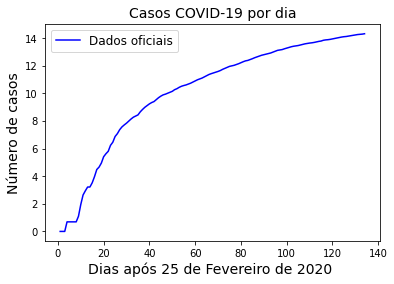

In [10]:
A=np.array(data) # transformando os dados em array's para melhor manipulação
x = A[:,0] # eixo Ox, correspodendo aos dias 
y = np.log(A[:,1]) # eixo Oy, correspodnendo ao número de casos
                   # aqui utilizamos a DICA para aproximar via log
# plotando o gráfico a partir dos dados fornecidos

plt.plot(x,y,color='b',label='Dados oficiais')
plt.xlabel('Dias após 25 de Fevereiro de 2020 ',FontSize=14)
plt.ylabel('Número de casos', FontSize=14)
plt.title('Casos COVID-19 por dia',FontSize=14)
plt.rcParams['legend.fontsize'] = 12
plt.legend()

#plt.savefig("figura6.png",dpi=300)
#files.download('figura6.png')

## Normalização dos dados

In [11]:
# normalizando via scaling

x = A[:,0] 
y = A[:,1] # retomando y original para normalização

x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
y1 = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos
y = np.log(y1+0.01) # tomando log de y já normalizado
                    # somamos 0.01 no argumento para log estar bem definido

Theta após 1000 iterações =  [-5.381989600589673, 5.565047014257679]
Valor da função de custo =  0.2490073655733249


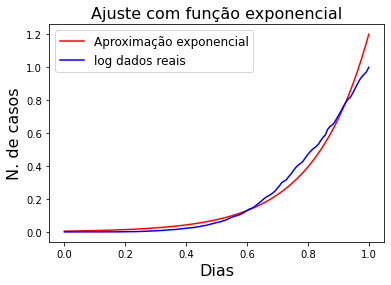

In [12]:
n = 1
m=len(x)

X=np.zeros([m,n+1])
x1=np.zeros([m,1])

for i in range(m):
    for j in range(n+1):
        X[i][j]=x[i]**j
        x1[i][0]=x[i]

theta=([1,1]) # theta inicial
alpha=1 # coeficiente de aprendizagem 
a=(np.dot(X, theta) - y)

for i in range(1000):
    t0=theta[0] - alpha*(1/m)*(sum(a)) 
    t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
    theta=([t0,t1]) # armazenando os novos thetas
    a=(np.dot(X, theta) - y)
print("Theta após 1000 iterações = ", theta)

b = np.exp(theta[0])
a = theta[1]
z = np.zeros([m])
for i in range(m):
  z[i] = b*np.exp(a*(x[i]))

plt.plot(x,z, color='red',label='Aproximação exponencial')
plt.plot(x,y1, color='blue',label='log dados reais')
plt.ylabel('N. de casos', FontSize=16)
plt.xlabel('Dias',FontSize=16)
plt.title('Ajuste com função exponencial',FontSize=16)
plt.rcParams['legend.fontsize'] = 12
plt.legend()
print("Valor da função de custo = ",(z-y1).T@(z-y1))

#plt.savefig("figura7.png",dpi=300)
#files.download('figura7.png')

Valor da função de custo =  0.2490073655733249


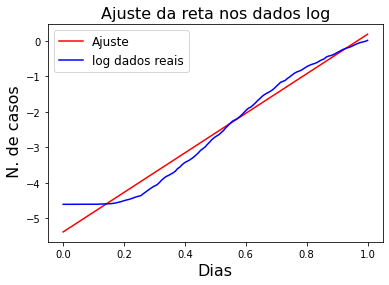

In [ ]:
plt.plot(x,X@theta, color='red',label='Ajuste')
plt.plot(x,y, color='blue',label='log dados reais')
plt.ylabel(' N. de casos', FontSize=16)
plt.xlabel('Dias',FontSize=16)
plt.title('Ajuste da reta nos dados log',FontSize=16)
plt.rcParams['legend.fontsize'] = 12
plt.legend()
print("Valor da função de custo = ",(z-y1).T@(z-y1))

#plt.savefig("figura8.png",dpi=300)
#files.download('figura8.png')

# PARTE 3

## Teste para alphas distintos

Taxa de aprendizagem:  0.001
Valor da função de custo =  0.18217284810729178
 
Taxa de aprendizagem:  0.003
Valor da função de custo =  0.18217347005284443
 
Taxa de aprendizagem:  0.01
Valor da função de custo =  0.18216660231479875
 
Taxa de aprendizagem:  0.03
Valor da função de custo =  0.1821728211895551
 
Taxa de aprendizagem:  0.1
Valor da função de custo =  0.1821041306665919
 
Taxa de aprendizagem:  0.3
Valor da função de custo =  0.1821662612064416
 
Taxa de aprendizagem:  1.0
Valor da função de custo =  0.1814780383491485
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

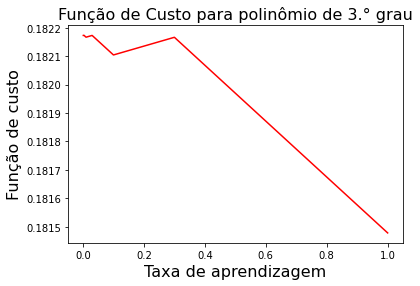

In [39]:
alpha0=np.array([[0.001,0.003,0.01,0.03,0.1,0.3,1, 10]])
iterac0=np.array([[100000,33333,10000,3333,1000,333,100,100]])

# optamos por retirar o caso em que alpha=10 para melhorar a vizualização gráfica
# neste caso, a função de custo assume valor muito alto (em torno de 1.4757)

num=7   # quantidade de alphas a serem testados (apenas os 7 primeiros da lista)

q=np.zeros([num])
w=np.zeros([num])

for k in range(num):
    x=A[:,0] # eixo x
    y=A[:,1] # eixo y
    x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
    y = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos

    n=3 #grau do polinômio 
    m=len(x)
    X=np.zeros([m,n+1])
    x1=np.zeros([m,1])
    x2=np.zeros([m,1])
    x3=np.zeros([m,1])
    for i in range(m):
        for j in range(n+1):
            X[i][j]=x[i]**j
            x1[i][0]=x[i]
            x2[i][0]=x[i]**2
            x3[i][0]=x[i]**3

    theta=([1,1,1,1])
    alpha=alpha0[0,k]
    iterac=iterac0[0,k]
    a=(np.dot(X, theta) - y)

    for i in range(iterac):
        t0=theta[0] - alpha*(1/m)*(sum(a))
        t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
        t2=theta[2] - alpha*(1/m)*(sum(a.T@x2))
        t3=theta[3] - alpha*(1/m)*(sum(a.T@x3))
        theta=([t0,t1,t2,t3])
        a=(np.dot(X, theta) - y)
        
    print("Taxa de aprendizagem: ",alpha)    
    print("Valor da função de custo = ",a.T@a)
    q[k]= alpha0[0,k]
    w[k]=a.T@a
    print(" ")

plt.plot(q,w, color='red')
plt.ylabel('Função de custo', FontSize=16)
plt.xlabel('Taxa de aprendizagem',FontSize=16)
plt.title('Função de Custo para polinômio de 3.° grau',FontSize=16)

#plt.savefig("figura9.png",width="50", dpi=300)
#files.download('figura9.png')

Taxa de aprendizagem:  0.001
Valor da função de custo =  0.03164350059599222
 
Taxa de aprendizagem:  0.003
Valor da função de custo =  0.03164351312869956
 
Taxa de aprendizagem:  0.01
Valor da função de custo =  0.031643459138549206
 
Taxa de aprendizagem:  0.03
Valor da função de custo =  0.03164358445755139
 
Taxa de aprendizagem:  0.1
Valor da função de custo =  0.03164304466723974
 
Taxa de aprendizagem:  0.3
Valor da função de custo =  0.03164429705039466
 
Taxa de aprendizagem:  1.0
Valor da função de custo =  0.03163891042018403
 


Text(0.5, 1.0, 'Função de Custo para polinômio de 5.° grau')

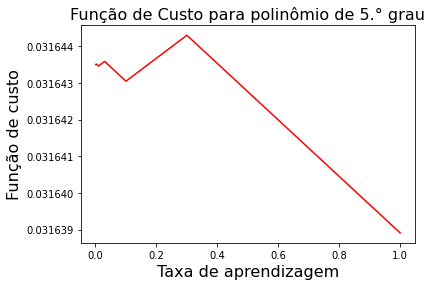

In [34]:
alpha0=np.array([[0.001,0.003,0.01,0.03,0.1,0.3,1, 10]])
iterac0=np.array([[100000,33333,10000,3333,1000,333,100,100]])

# optamos por retirar o caso em que alpha=10 para melhorar a vizualização gráfica
# neste caso, a função de custo assume valor muito alto (em torno de 4.416259)

num=7   # quantidade de alphas a serem testados (apenas os 7 primeiros da lista)

q=np.zeros([num])
w=np.zeros([num])

for k in range(num):
    x=A[:,0] # eixo x
    y=A[:,1] # eixo y
    x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
    y = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos

    n=5 #grau do polinômio 
    m=len(x)
    X=np.zeros([m,n+1])
    x1=np.zeros([m,1])
    x2=np.zeros([m,1])
    x3=np.zeros([m,1])
    x4=np.zeros([m,1])
    x5=np.zeros([m,1])
    for i in range(m):
        for j in range(n+1):
            X[i][j]=x[i]**j
            x1[i][0]=x[i]
            x2[i][0]=x[i]**2
            x3[i][0]=x[i]**3
            x4[i][0]=x[i]**4
            x5[i][0]=x[i]**5

    theta=([1,1,1,1,1,1])
    alpha=alpha0[0,k]
    iterac=iterac0[0,k]
    a=(np.dot(X, theta) - y)

    for i in range(iterac):
        t0=theta[0] - alpha*(1/m)*(sum(a))
        t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
        t2=theta[2] - alpha*(1/m)*(sum(a.T@x2))
        t3=theta[3] - alpha*(1/m)*(sum(a.T@x3))
        t4=theta[4] - alpha*(1/m)*(sum(a.T@x4))
        t5=theta[5] - alpha*(1/m)*(sum(a.T@x5))
        theta=([t0,t1,t2,t3,t4,t5])
        a=(np.dot(X, theta) - y)
        
    print("Taxa de aprendizagem: ",alpha)    
    print("Valor da função de custo = ",a.T@a)
    q[k]= alpha0[0,k]
    w[k]=a.T@a
    print(" ")

plt.plot(q,w, color='red')
plt.ylabel('Função de custo', FontSize=16)
plt.xlabel('Taxa de aprendizagem',FontSize=16)
plt.title('Função de Custo para polinômio de 5.° grau',FontSize=16)

#plt.savefig("figura10.png",dpi=300)
#files.download('figura10.png')

Taxa de aprendizagem:  0.001
Valor da função de custo =  0.1322895821675111
 
Taxa de aprendizagem:  0.003
Valor da função de custo =  0.13228997675847634
 
Taxa de aprendizagem:  0.01
Valor da função de custo =  0.1322875829094245
 
Taxa de aprendizagem:  0.03
Valor da função de custo =  0.1322915313170371
 
Taxa de aprendizagem:  0.1
Valor da função de custo =  0.13226763760445728
 
Taxa de aprendizagem:  0.3
Valor da função de custo =  0.132307371136507
 
Taxa de aprendizagem:  1.0
Valor da função de custo =  0.13207282115441402
 


Text(0.5, 1.0, 'Função de Custo para polinômio de 10.° grau')

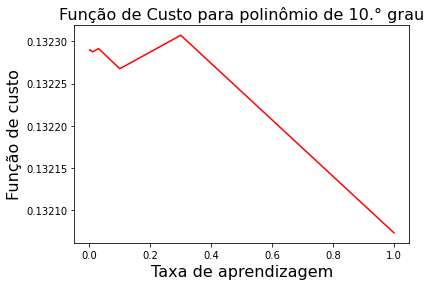

In [36]:
alpha0=np.array([[0.001,0.003,0.01,0.03,0.1,0.3,1, 10]])
iterac0=np.array([[100000,33333,10000,3333,1000,333,100,100]])

# optamos por retirar o caso em que alpha=10 para melhorar a vizualização gráfica
# neste caso, a função de custo assume valor muito alto (em torno de 8.197385)

num=7  # quantidade de alphas a serem testados (apenas os 7 primeiros da lista)

q=np.zeros([num])
w=np.zeros([num])

for k in range(num):
    x=A[:,0] # eixo x
    y=A[:,1] # eixo y
    x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
    y = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos

    n=10 #grau do polinômio 
    m=len(x)
    X=np.zeros([m,n+1])
    x1=np.zeros([m,1])
    x2=np.zeros([m,1])
    x3=np.zeros([m,1])
    x4=np.zeros([m,1])
    x5=np.zeros([m,1])
    x6=np.zeros([m,1])
    x7=np.zeros([m,1])
    x8=np.zeros([m,1])
    x9=np.zeros([m,1])
    x10=np.zeros([m,1])
    for i in range(m):
        for j in range(n+1):
            X[i][j]=x[i]**j
            x1[i][0]=x[i]
            x2[i][0]=x[i]**2
            x3[i][0]=x[i]**3
            x4[i][0]=x[i]**4
            x5[i][0]=x[i]**5
            x6[i][0]=x[i]**6
            x7[i][0]=x[i]**7
            x8[i][0]=x[i]**8
            x9[i][0]=x[i]**9
            x10[i][0]=x[i]**10

    theta=([1,1,1,1,1,1,1,1,1,1,1])
    alpha=alpha0[0,k]
    iterac=iterac0[0,k]
    a=(np.dot(X, theta) - y)

    for i in range(iterac):
        t0=theta[0] - alpha*(1/m)*(sum(a))
        t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
        t2=theta[2] - alpha*(1/m)*(sum(a.T@x2))
        t3=theta[3] - alpha*(1/m)*(sum(a.T@x3))
        t4=theta[4] - alpha*(1/m)*(sum(a.T@x4))
        t5=theta[5] - alpha*(1/m)*(sum(a.T@x5))
        t6=theta[6] - alpha*(1/m)*(sum(a.T@x6))
        t7=theta[7] - alpha*(1/m)*(sum(a.T@x7))
        t8=theta[8] - alpha*(1/m)*(sum(a.T@x8))
        t9=theta[9] - alpha*(1/m)*(sum(a.T@x9))
        t10=theta[10] - alpha*(1/m)*(sum(a.T@x10))
        theta=([t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10])
        a=(np.dot(X, theta) - y)

    print("Taxa de aprendizagem: ",alpha)    
    print("Valor da função de custo = ",a.T@a)
    q[k]= alpha0[0,k]
    w[k]=a.T@a
    print(" ")

plt.plot(q,w, color='red')
plt.ylabel('Função de custo', FontSize=16)
plt.xlabel('Taxa de aprendizagem',FontSize=16)
plt.title('Função de Custo para polinômio de 10.° grau',FontSize=16)


#plt.savefig("figura11.png",dpi=300)
#files.download('figura11.png')

Taxa de aprendizagem:  0.001
Valor da função de custo =  1.8026870407203957
 
Taxa de aprendizagem:  0.003
Valor da função de custo =  1.8026852422924509
 
Taxa de aprendizagem:  0.01
Valor da função de custo =  1.802677525836337
 
Taxa de aprendizagem:  0.03
Valor da função de custo =  1.8026595778767802
 
Taxa de aprendizagem:  0.1
Valor da função de custo =  1.8025830166646835
 
Taxa de aprendizagem:  0.3
Valor da função de custo =  1.8024071706491893
 
Taxa de aprendizagem:  1.0
Valor da função de custo =  1.8017011585970244
 
Taxa de aprendizagem:  10.0
Valor da função de custo =  inf
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, 'Função de Custo para exponencial')

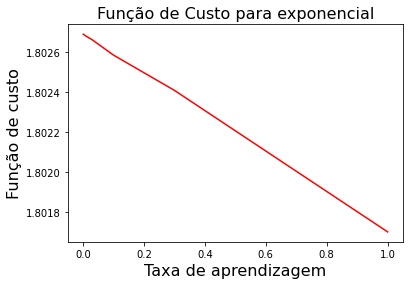

In [42]:
alpha0=np.array([[0.001,0.003,0.01,0.03,0.1,0.3,1, 10]])
iterac0=np.array([[100000,33333,10000,3333,1000,333,100,100]])

num=8   # quantidade de alphas a serem testados (apenas os 7 primeiros da lista)

q=np.zeros([num])
w=np.zeros([num])

for k in range(num):
    x = A[:,0] # eixo x
    y = A[:,1] # eixo y
    x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
    y1 = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos
    y = np.log(y1+0.1)

    n=1 
    m=len(x)
    X=np.zeros([m,n+1])
    x1=np.zeros([m,1])
    for i in range(m):
        for j in range(n+1):
            X[i][j]=x[i]**j
            x1[i][0]=x[i]

    theta=([1,1])
    alpha=alpha0[0,k]
    iterac=iterac0[0,k]
    a=(np.dot(X, theta) - y)

    for i in range(iterac):
        t0=theta[0] - alpha*(1/m)*(sum(a))
        t1=theta[1] - alpha*(1/m)*(sum(a.T@x1))
        theta=([t0,t1])
        a=(np.dot(X, theta) - y)
    
    b = np.exp(theta[0])
    a = theta[1]
    z = np.zeros([m])
    for i in range(m):
      z[i] = b*np.exp(a*(x[i]))

    print("Taxa de aprendizagem: ",alpha)
    print("Valor da função de custo = ",(z-y1).T@(z-y1))
    q[k]= alpha0[0,k]
    w[k]=(z-y1).T@(z-y1)
    print(" ")
plt.plot(q,w, color='red')
plt.ylabel('Função de custo', FontSize=16)
plt.xlabel('Taxa de aprendizagem',FontSize=16)
plt.title('Função de Custo para exponencial',FontSize=16)


#plt.savefig("figura12.png",dpi=300)
#files.download('figura12.png')

# PARTE 4

## Implementação do ajusto exponencial via equações normais

Theta 0: 0.057768233993568056
Theta 1: 2.6743075343371614
Função de custo:  1.797958472890694


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

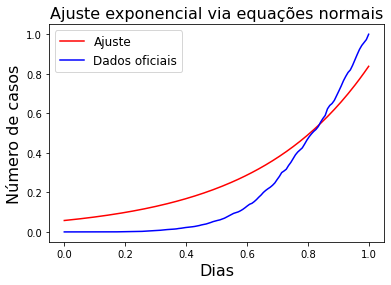

In [45]:
x = A[:,0] #eixo x
y = A[:,1] #eixo y
x = (x-min(x))/(max(x)-min(x)) # normalizando os dias
y1 = (y-min(y))/(max(y)-min(y)) # normalizando o número de casos
y = np.log(y1+0.1)

n=1 
m=len(x)
X=np.zeros([m,n+1])
for i in range(m):
  for j in range(n+1):
    X[i][j]=x[i]**j

M = np.linalg.inv(np.dot(X.T, X))
N = np.dot(X.T, y)
theta = np.dot(M, N)
t_0 = np.exp(theta[0])
t_1 = theta[1]

print("Theta 0:", t_0)
print("Theta 1:", t_1)

f=np.zeros([m])
for i in range(m):
    f[i]=t_0*np.exp(t_1*x[i])


print("Função de custo: ",(f-y1).T@(f-y1))
plt.plot(x,f, color='red',label='Ajuste')
plt.plot(x,y1, color='blue',label='Dados oficiais')
plt.ylabel('Número de casos', FontSize=16)
plt.xlabel('Dias',FontSize=16)
plt.title('Ajuste exponencial via equações normais',FontSize=16)
plt.rcParams['legend.fontsize'] = 12
plt.legend()   

plt.savefig("figura13.png",dpi=300)
files.download('figura13.png')